In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

Single feature LSTM model using Uber SEC financial data plusing closing prices

In [18]:
uber_sec = pd.read_csv('/Users/krist/OneDrive/Desktop/P2G2-ProjectGit/Notebooks/models/resources/UBER_copy.csv', index_col = 0)
uber_sec.tail()

,Revenues,CostOfGoodsAndServiceExcludingDepreciationDepletionAndAmortization,OperationsAndSupportExpense,SellingAndMarketingExpense,ResearchAndDevelopmentExpense,GeneralAndAdministrativeExpense,DepreciationDepletionAndAmortization,CostsAndExpenses,OperatingIncomeLoss,InterestExpense,...,Unnamed: 16,NetIncomeLoss,EarningsPerShareBasic,EarningsPerShareDiluted,WeightedAverageNumberOfSharesOutstandingBasic,WeightedAverageNumberOfDilutedSharesOutstanding,NetIncomeLossAttributableToRedeemableNoncontrollingInterest,ticker,close,volume
date,,,,,,,,,,,,,,,,,,,,,
2022-05-25,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-482000000.0,129000000.0,...,12000000.0,-5.930000e+09,-3.03,-3.04,1.953989e+09,1.957731e+09,-10000000.0,UBER,22.04,31152964.0
2022-05-26,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-482000000.0,129000000.0,...,12000000.0,-5.930000e+09,-3.03,-3.04,1.953989e+09,1.957731e+09,-10000000.0,UBER,23.10,30156204.0
2022-05-27,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-482000000.0,129000000.0,...,12000000.0,-5.930000e+09,-3.03,-3.04,1.953989e+09,1.957731e+09,-10000000.0,UBER,23.67,29620958.0
2022-05-31,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-482000000.0,129000000.0,...,12000000.0,-5.930000e+09,-3.03,-3.04,1.953989e+09,1.957731e+09,-10000000.0,UBER,23.20,33048952.0
2022-06-01,6.854000e+09,4.026000e+09,574000000.0,1.263000e+09,587000000.0,632000000.0,254000000.0,7.336000e+09,-482000000.0,129000000.0,...,12000000.0,-5.930000e+09,-3.03,-3.04,1.953989e+09,1.957731e+09,-10000000.0,UBER,22.94,26285752.0


In [3]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [4]:
#Setting the feature col to revenue and target col to closing prices
X, y = window_data(uber_sec, window=30, feature_col_number=0, target_col_number=23)

In [5]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.7 * len(X))
X_train = X[: split]
X_test = X[split:]
y_train = y[: split]
y_test = y[split:]

In [6]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the MinMaxScaler object with the features data X
scaler.fit(X_train)

# Scale the features training and testing sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Fit the MinMaxScaler object with the target data Y
scaler.fit(y_train)

# Scale the target training and testing sets
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [7]:
# Reshape the features for the model

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [9]:

model = Sequential()

number_units = 5
dropout_fraction = 0.2

#Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

#Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

#Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

#Output Layer
model.add(Dense(1))

In [10]:
model.compile(optimizer='adam', loss = 'mean_squared_error')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 5)             140       
                                                                 
 dropout (Dropout)           (None, 30, 5)             0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 5)             220       
                                                                 
 dropout_1 (Dropout)         (None, 30, 5)             0         
                                                                 
 lstm_2 (LSTM)               (None, 5)                 220       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [12]:
model.fit(X_train, y_train, epochs=15, shuffle=False, batch_size=1, verbose=1)

Epoch 1/15
519/519 [==============================] - 22s 29ms/step - loss: 0.0427
Epoch 2/15
519/519 [==============================] - 14s 28ms/step - loss: 0.0189
Epoch 3/15
519/519 [==============================] - 17s 33ms/step - loss: 0.0183
Epoch 4/15
519/519 [==============================] - 16s 30ms/step - loss: 0.0174
Epoch 5/15
519/519 [==============================] - 16s 31ms/step - loss: 0.0187
Epoch 6/15
519/519 [==============================] - 16s 31ms/step - loss: 0.0214
Epoch 7/15
519/519 [==============================] - 17s 33ms/step - loss: 0.0219
Epoch 8/15
519/519 [==============================] - 16s 31ms/step - loss: 0.0231
Epoch 9/15
519/519 [==============================] - 17s 32ms/step - loss: 0.0233
Epoch 10/15
519/519 [==============================] - 15s 29ms/step - loss: 0.0257
Epoch 11/15
519/519 [==============================] - 15s 29ms/step - loss: 0.0251
Epoch 12/15
519/519 [==============================] - 15s 30ms/step - loss: 0.0351
E

In [13]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 2s 8ms/step - loss: 0.0525


0.05250095948576927

In [14]:
predict = model.predict(X_test)

7/7 [==============================] - 2s 7ms/step


In [15]:
predicted_prices = scaler.inverse_transform(predict)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [16]:
# Create a DataFrame of Real and Predicted values
stocks_rev = pd.DataFrame({
    "actual": real_prices.ravel(),
    "predicted": predicted_prices.ravel()
}, index = uber_sec.index[-len(real_prices): ]) 
stocks_rev.head()

,actual,predicted
date,,
2021-07-15,47.15,47.316124
2021-07-16,46.42,47.311558
2021-07-19,46.19,47.308426
2021-07-20,45.56,47.306305
2021-07-21,46.32,47.304893


<AxesSubplot:title={'center':'Actual vs. Predicted Prices'}, xlabel='Date', ylabel='UBER'>

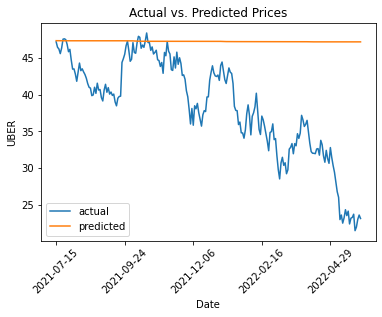

In [17]:
stocks_rev.plot(xlabel = 'Date', ylabel = 'UBER', title = 'Actual vs. Predicted Prices', rot=45)